In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import joblib

In [2]:
# read in csv and drop unnecessary columns
df = pd.read_csv('encoded_transactions.csv').drop(columns=["offer_completed", "paid", "age", "became_member_on", 
                                                           "offer_viewed", "offer_completed_y_n", "offer_received"])
df

,offer_id,gender,income,reward,channels,difficulty,duration,offer_type,offer_viewed_y_n
0,0,2,72000.0,0.0,2,0.0,3.0,1,1
1,3,2,72000.0,0.0,0,0.0,4.0,1,1
2,2,2,72000.0,5.0,1,5.0,5.0,2,1
3,5,2,72000.0,2.0,1,10.0,10.0,0,1
4,7,2,72000.0,2.0,0,10.0,7.0,0,1
...,...,...,...,...,...,...,...,...,...
66496,9,0,62000.0,5.0,3,20.0,10.0,0,1
66497,7,0,62000.0,2.0,0,10.0,7.0,0,1
66498,7,0,62000.0,2.0,0,10.0,7.0,0,1
66499,4,0,62000.0,5.0,0,5.0,7.0,2,1


In [3]:
y = df["offer_viewed_y_n"]
X = df.drop("offer_viewed_y_n", axis=1)
target_names = [0, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
train_scores = []
test_scores = []

knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_scaled, y_train)
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)
train_scores.append(train_score)
test_scores.append(test_score)
print(f"k: 19, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 19, Train/Test Score: 0.968/0.966


C:\Users\kelly\Anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\kelly\Anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


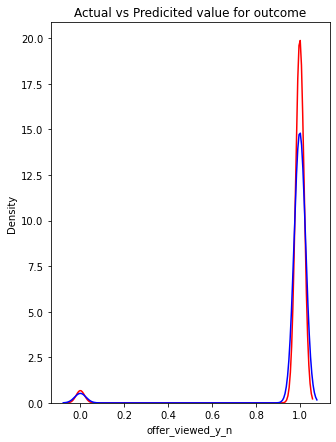

In [4]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(df['offer_viewed_y_n'], hist=False, color="r", label="Actual Value")
sns.distplot(y_test, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Predicited value for outcome')
plt.show()
plt.close()

In [5]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.1798913623708462

In [6]:
test_preds = knn.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse


0.1843445641202976

In [7]:
test_entry_dict = [{"offer_id":9, "gender":1, "income":62000, "reward":2, "channels":2, 
                            "difficulty":10, "duration":10, "offer_type":0}]
test_entry_df = pd.DataFrame(test_entry_dict)

print(int(knn.predict(test_entry_df)))

1


In [9]:
# Save the model as a pickle in a file
joblib.dump(knn, 'view_offer.pkl')

['view_offer.pkl']